<a href="https://colab.research.google.com/github/ojhahem-3/Netflix-Data-Analysis/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Rows and columns:", df.shape)



Rows and columns: (8807, 12)


In [ ]:
print("Column names:\n", df.columns)


Column names:
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [ ]:
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df_cleaned = df.drop(columns=['show_id', 'description'])


In [ ]:
df_cleaned.head()


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021.0
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021.0
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021.0
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021.0
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021.0


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

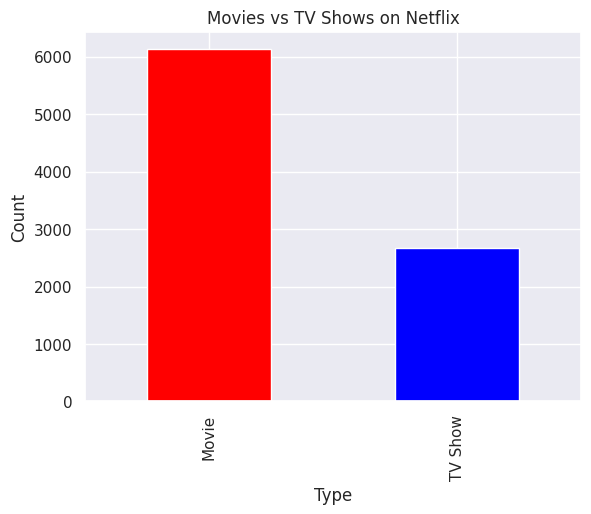

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of Movies and TV Shows
type_counts = df_cleaned['type'].value_counts()

# Plot it
sns.set(style="darkgrid")
type_counts.plot(kind='bar', color=['red', 'blue'])
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


<ipython-input-13-81be22a2b9e4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(genres), palette="viridis")


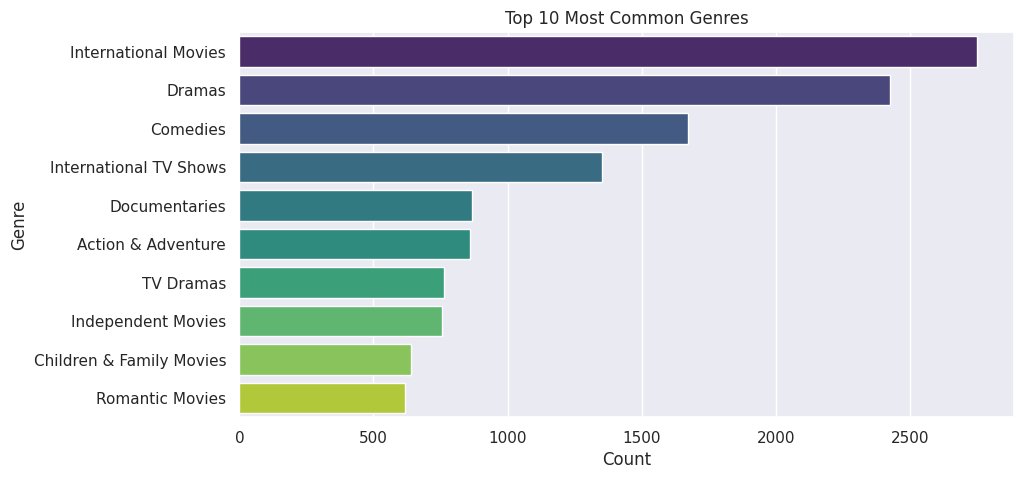

In [ ]:
# Some entries have multiple genres split by commas, so split and count
from collections import Counter

genre_list = df_cleaned['listed_in'].dropna().apply(lambda x: x.split(', '))
all_genres = [genre for sublist in genre_list for genre in sublist]
genre_counts = Counter(all_genres).most_common(10)

# Plot
genres, counts = zip(*genre_counts)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(genres), palette="viridis")
plt.title("Top 10 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


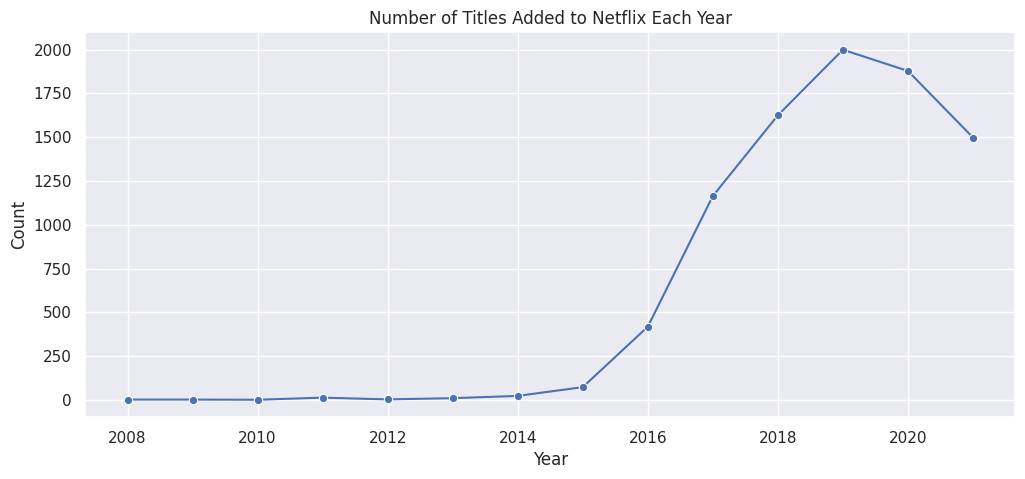

In [ ]:
# Convert date_added to datetime
df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'], errors='coerce')

# Extract year
df_cleaned['year_added'] = df_cleaned['date_added'].dt.year

# Count per year
year_counts = df_cleaned['year_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,5))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o")
plt.title("Number of Titles Added to Netflix Each Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


<ipython-input-15-d86157765ac8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="magma")


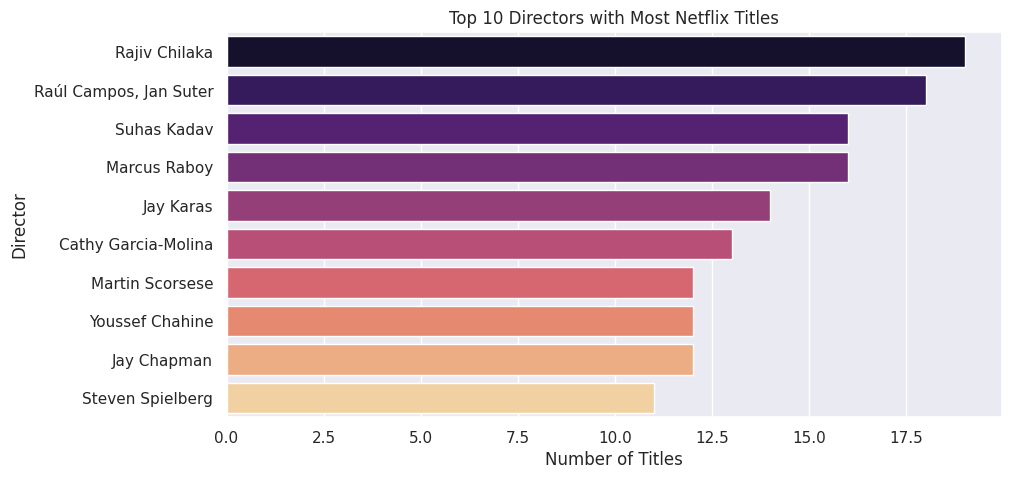

In [ ]:
top_directors = df_cleaned['director'].value_counts().dropna().head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="magma")
plt.title("Top 10 Directors with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()
